# COVID-19 Dataset

**March 17, 2020**

As my third day of social isolation draws to a close, it's hard to sift through all the emotions - the worry and stress and anxiety, the inability to stay away from refreshing the news and social media for even a few minutes. With my family in California and the large majority of friends in either Seattle or Italy, this pandemic hits home for me. With any kind of stress, though, one can find solace in data. Lists. Facts. 

There's a lot of COVID-19 datasets starting to creep up around the internet. Some seem to be hand-crafted by curious data scientists, while others are more official. Some give just the total counts of cases (total, recovered, deaths) in each country or region, while a few also provide some details such as age, gender, preexisting health conditions, etc. Some are - mostly - complete, while others having gaping holes of missing data. And of course, they're all changing rapidly every day as more tests are performed and more people get sick.

In [30]:
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

#some of the other datasets commented out:
#data = pd.read_csv('https://raw.githubusercontent.com/open-covid-19/data/master/output/world.csv')
#data.to_csv('./data/covid19world.csv')
#data = pd.read_csv('./data/COVID19_2020_open_line_list_all.csv')
#csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

#The Johns Hopkins dataset is the most official and updated once a day, though it's not perfect! We'll start with this one
data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [31]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


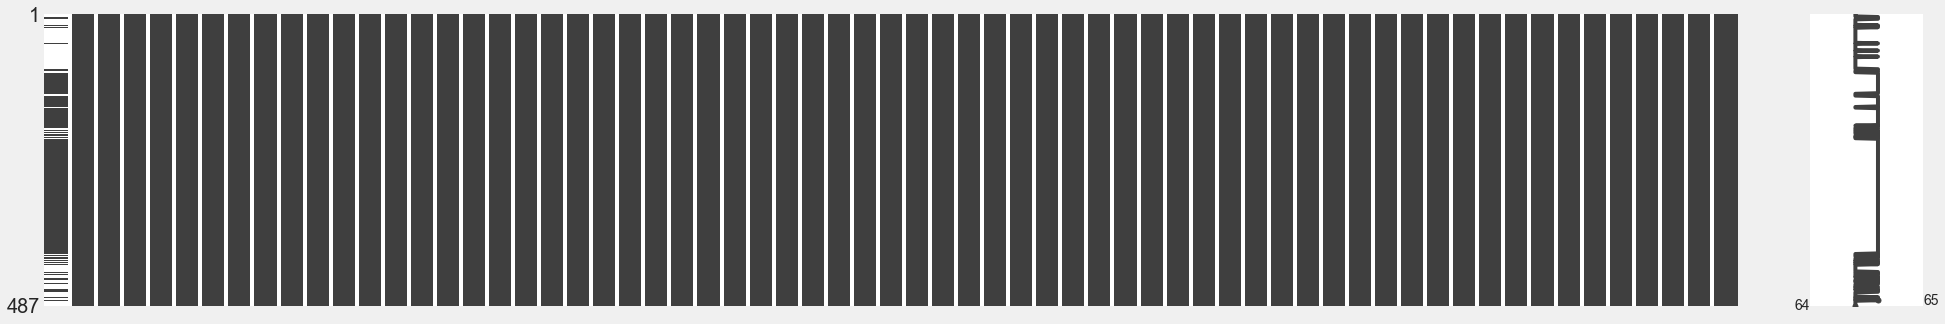

In [32]:
# How many missing values are there in our dataset?
missingno.matrix(data, figsize = (30,5))

It looks like there's not much missing data - except if you look closely, that's not entirely true. This dataset is a little bit of a disaster, as the people at Johns Hopkins keep changing things at random! According to [some people on Reddit](https://www.reddit.com/r/datasets/comments/exnzrd/coronavirus_datasets/), the data from Germany disappeared one day, some of the countries/provinces have changed names, and as of a few days ago, all of the data for the US prior to 3/10 completely disappeared - showing a crazy spike from 0 to hundreds of cases seemingly instantly. How fun. Let's see what we can do with what we have, and if we can fill in any blanks. Maybe the dataset will fix itself soon!

In [33]:
us_data = data[data['Country/Region']=='US']

In [34]:
us_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,568,572,643,904,1076,1014,1376,1524,1793,1996
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,421,525,732,967,1706,2495,5365,8310,11710,15793
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,282,340,426,557,698,751,952,1177,1364,1642
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,123,138,164,197,218,218,328,413,525,646
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,46,47,47,47,47,49,49,49


In [35]:
italy_data = data[data['Country/Region']=='Italy']

In [36]:
italy_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
16,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138


Not entirely sure why the each new day is entered as a column rather than a row - certainly the opposite would have been more useful for further analysis, but we can transpose the data ourselves to plot.

In [37]:
def transpose_country_data(df, country):
    country_data = df[df['Country/Region']==country]
    country_T = country_data.drop(columns=['Province/State', 'Country/Region','Lat', 'Long']).transpose()
    country_T = country_T.rename(columns={country_T.columns[0]: country})
    return country_T

In [38]:
def transpose_data(df, state):
    state_data = df[df['Province/State']==state]
    state_T = state_data.drop(columns=['Province/State', 'Country/Region','Lat', 'Long']).transpose()
    state_T = state_T.rename(columns={state_T.columns[0]: state})
    return state_T

In [39]:
Ill_data = transpose_data(data, 'Illinois')
Penn_data = transpose_data(data, 'Pennsylvania')
Maryland_data = transpose_data(data, 'Maryland')
NC_data = transpose_data(data, 'North Carolina')
Texas_data = transpose_data(data, 'Texas')
Iowa_data = transpose_data(data, 'Iowa')
Colorado_data = transpose_data(data, 'Colorado')
Florida_data = transpose_data(data, 'Florida')
Oregon_data = transpose_data(data, 'Oregon')
NJ_data = transpose_data(data, 'New Jersey')
SC_data = transpose_data(data, 'South Carolina')
TN_data = transpose_data(data, 'Tennessee')
Virginia_data = transpose_data(data, 'Virginia')
AZ_data = transpose_data(data, 'Arizona')
Indiana_data = transpose_data(data, 'Indiana')
Kentucky_data = transpose_data(data, 'Kentucky')

WA_data = transpose_data(data, 'Washington')

Italy_data_T = transpose_country_data(italy_data, 'Italy')

For the US, most of the states other than WA and CA had few cases prior to 3/10 when the data disappeared, so there's no problem keeping these rows as is! For WA and CA, however, the sudden jumps make no sense. I haven't yet been able to find a reliable source to impute this missing data for the full state, but King County (where Seattle is located) has been releasing the total cases at the end of each day on their government health site:

In [48]:
# inputted manually from https://www.kingcounty.gov/depts/health/news/2020/March.aspx
WA_King_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 10, 14, 21, 31, 51, 58, 71, 83, 116, 190, 234, 270, 328, 388, 420, 488, 518, 562, 693, 793, 934, 1040]

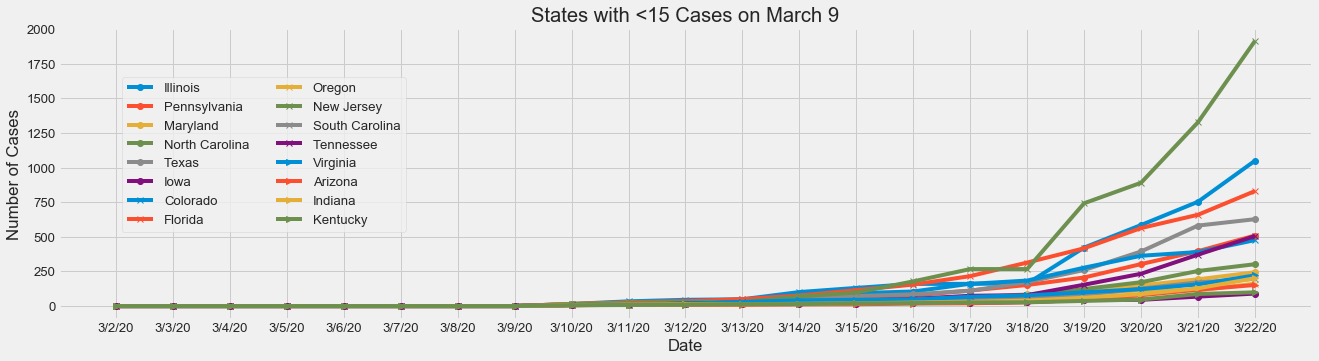

In [41]:
fig = plt.figure(figsize=(20,5))
sns.set(font_scale=1.2)

plt.style.use('fivethirtyeight')
plt.plot(Ill_data[40:],marker='o', label = 'Illinois')
plt.plot(Penn_data[40:],marker='o', label='Pennsylvania')
plt.plot(Maryland_data[40:],marker='o', label='Maryland')
plt.plot(NC_data[40:],marker='o', label='North Carolina')
plt.plot(Texas_data[40:],marker='o', label='Texas')
plt.plot(Iowa_data[40:],marker='o', label='Iowa')
plt.plot(Colorado_data[40:],marker='x', label='Colorado')
plt.plot(Florida_data[40:],marker='x', label='Florida')
plt.plot(Oregon_data[40:],marker='x', label='Oregon')
plt.plot(NJ_data[40:],marker='x', label='New Jersey')
plt.plot(SC_data[40:],marker='x', label='South Carolina')
plt.plot(TN_data[40:],marker='x', label='Tennessee')
plt.plot(Virginia_data[40:],marker='>', label='Virginia')
plt.plot(AZ_data[40:],marker='>', label='Arizona')
plt.plot(Indiana_data[40:],marker='>', label='Indiana')
plt.plot(Kentucky_data[40:],marker='>', label='Kentucky')

plt.legend(loc=(0.05,0.3), ncol=2)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('States with <15 Cases on March 9');

In [54]:
import numpy as np

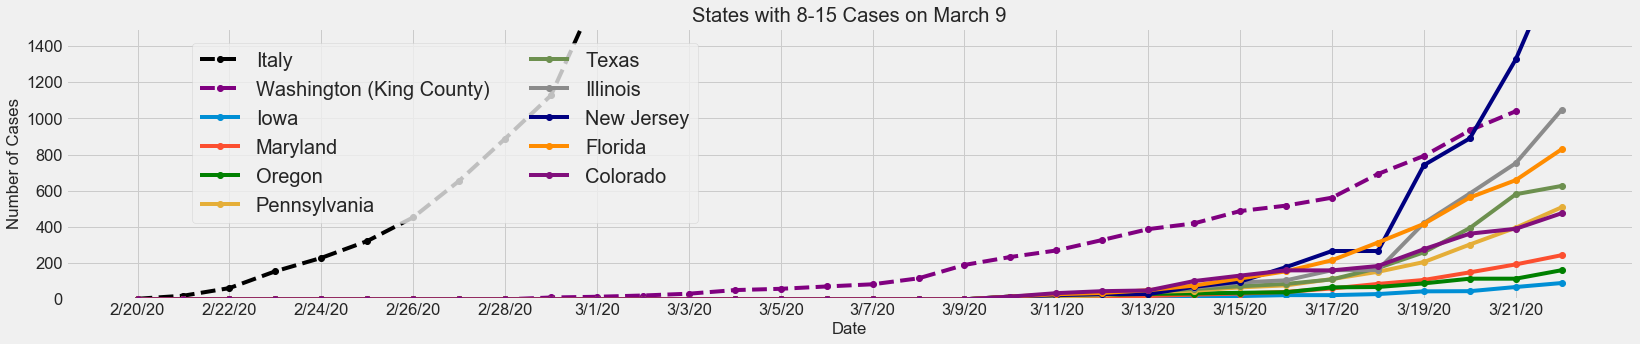

In [64]:
fig = plt.figure(figsize=(23,5))
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

plt.plot(Italy_data_T[29:],marker='o', label='Italy', color='black', ls='--')
plt.plot(WA_King_data[29:],marker='o', label='Washington (King County)', color='purple', ls='--')
plt.plot(Iowa_data[29:],marker='o', label='Iowa')
plt.plot(Maryland_data[29:],marker='o', label='Maryland')
plt.plot(Oregon_data[29:],marker='o', label='Oregon', color='green')
plt.plot(Penn_data[29:],marker='o', label='Pennsylvania')
plt.plot(Texas_data[29:],marker='o', label='Texas')
plt.plot(Ill_data[29:],marker='o', label = 'Illinois')
plt.plot(NJ_data[29:],marker='o', label='New Jersey', color='navy')
plt.plot(Florida_data[29:],marker='o', label='Florida', color='darkorange')
plt.plot(Colorado_data[29:],marker='o', label='Colorado')
start = 0
end = len(Iowa_data)-29
plt.ylim(0,1500)
plt.legend(loc=(0.08,0.28), ncol=2, fontsize=20)
plt.xticks(np.arange(start, end, 2))
    
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('States with 8-15 Cases on March 9')
plt.tight_layout()
plt.savefig('covid19_us_1.png')

**Couple notes (3/18):** You can kind of tell when states started testing more frequently. The spike in Colorado could be due to a Colorado nurse who thought it was a good idea to go to Chicago for St. Patrick's day celebrations - "I'm not about to put my life on hold because this is going around," said Kyle Thomas, who said he was a nurse from Colorado who flew in to celebrate St. Patrick’s Day with his Chicago friends." It's interesting to see how varied the curves are for the past week, with states like Iowa, Maryland and Oregon seemingly under control - but is that just because they aren't testing? 

**Notes (3/23):** My God, New Jersey.

## Survival Analysis

### Resources:
1. [Survival Analysis: Intuition and Implementation in Python](https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e)
2. [Lifelines Documentation](https://lifelines.readthedocs.io/en/latest/)
3. [Lifelines Documentation for Survival Regression](https://lifelines.readthedocs.io/en/latest/Survival%20Regression.html)

Survival analysis is a statistical technique used for health, marketing, customer retention, and related fields using data to ask how long until a particular event happens. For example, it can be used (as it was originally designed for) to ask how likely a patient will survive after being diagnosed for a disease. It's also used widely by businesses to ask how long a customer will remain a customer, how long a customer will continue subscribing to a service, or even how long a machine has until it breaks down.

This method stems from pretty simple probability theory, where the time until some event (a patient dies, a customer unsubscribes, a machine breaks down) is described by a non-negative continuous random variable T. As with other probability calculations using random variables, their distributions are often characterized by the probability density function (pdf,) and cumulative distribution function (cdf, the probability that the event has occured by time t). In survival analysis, it is common to look at two additional functions:

* **Survival function**: S(t) = 1-F(t), the probability that the event has *not* occured by time t
* **Hazard function**: h(t) = f(t)/S(t), the rate at which the event is taking place (a measure of "risk")

The Hazard function incorporates two parts: the instantaneous rate of the event (the slope of the Survival curve/ rate of dying at any time t) and the proportion surviving at time t.

The **Cox Proportional Hazard Model** starts from the Hazard function, and models the time to event for an individual taking into account the presence of covariates (features). Mathematically, this turns the probability functions into *conditional* probabilities:

$h(t|X = x) = h_{0}(t)exp(x^{T}B)$

where **B** is the vector of coefficients of each covariate and h<sub>0</sub> is the baseline hazard function. This model assumes that the covariates have a linear multiplication effect on the hazard function, and that the effect stays the same as a function of time.

### Cox Proportional Hazard Model for COVID-19

In the present case, the Cox Proportional Hazard Model is ideal to model the progression of COVID-19 since it is widely assumed that the death rate of the disease is higher for individuals who are older or have preexisting conditions. Of course, this means that we also need to ensure we have adequate data for cases including these covariates - the data we investigated above isn't sufficient, since it only provides numbers of cases and deaths per location as a function of time. 

Looking at the other available datasets, the only one that I've come across so far which includes any covariate patient information is [this dataset from DXY.cn](https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/edit#gid=1187587451) - it's pretty haunting to look at, honestly, and feels like you're a doctor in an apocalyptic film scrolling through doctor's notes... For our purposes, it may work, but there's a *lot* of missing data, and for some reason it hasn't been updated since 3/15.

In [93]:
cox_data = pd.read_csv('./data/COVID19_2020_open_line_list_all.csv')

In [72]:
cox_data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,Unnamed: 32
0,33,32,male,Wuhan City,Hubei,China,0.0,30.62506,114.3421,admin2,...,discharged,16.01.2020,NaN,NaN,NaN,Wuhan City,Hubei,China,420100,NaN
1,34,49,female,Wuhan City,Hubei,China,0.0,30.62506,114.3421,admin2,...,discharged,16.01.2020,NaN,NaN,NaN,Wuhan City,Hubei,China,420100,NaN
2,60,15-88,female,Wuhan City,Hubei,China,0.0,30.62506,114.3421,admin2,...,died,NaN,NaN,NaN,NaN,Wuhan City,Hubei,China,420100,NaN
3,61,66,male,Wuhan City,Hubei,China,0.0,30.62506,114.3421,admin2,...,died,20.01.2020,NaN,NaN,NaN,Wuhan City,Hubei,China,420100,NaN
4,62,48,female,Wuhan City,Hubei,China,0.0,30.62506,114.3421,admin2,...,died,20.01.2020,NaN,NaN,NaN,Wuhan City,Hubei,China,420100,NaN


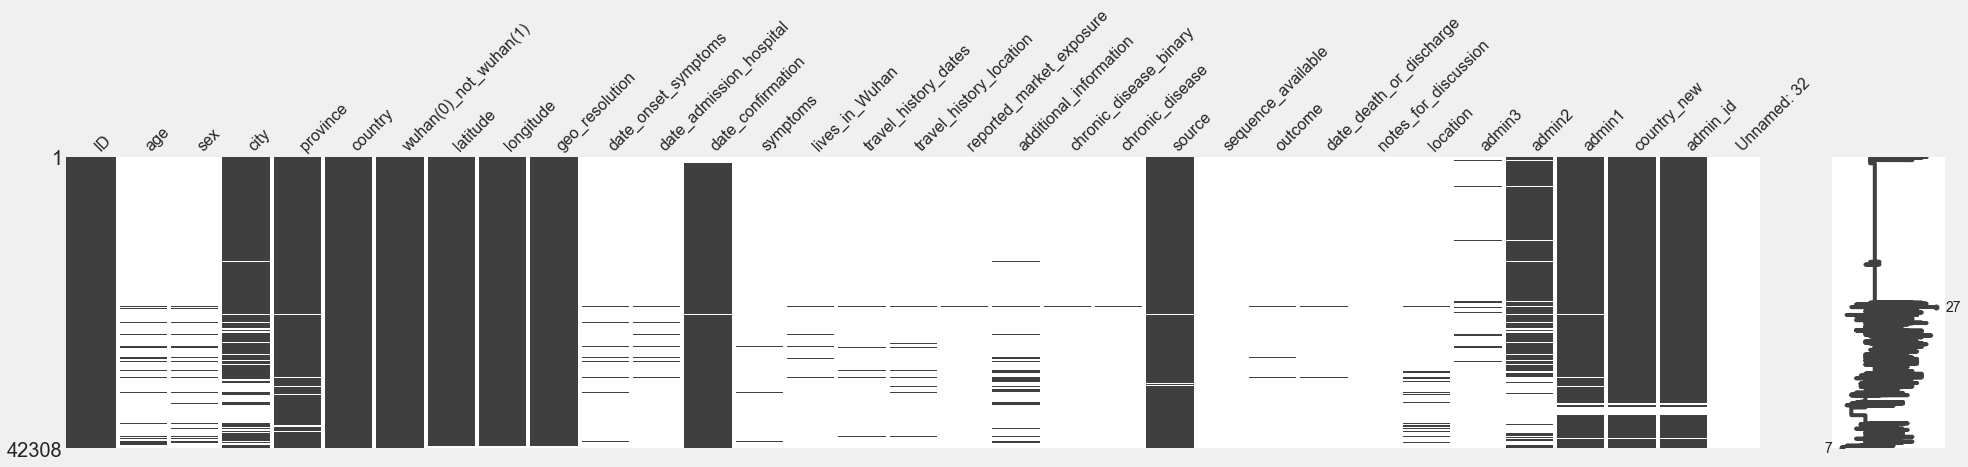

In [73]:
# How many missing values are there in our dataset?
missingno.matrix(cox_data, figsize = (30,5))

Ugh.

Let's clean this up a tad so it's easier to look at before we figure out if there's even enough data here to work with. We'll first remove some of the columns that we don't care about (some are duplicates, some are irrelevant, some are empty): 

In [75]:
cox_data.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'Unnamed: 32'],
      dtype='object')

In [94]:
cols_to_remove = ['geo_resolution', 'source', 'sequence_available', 'location', 'admin1', 'admin2', 'admin3', 'country_new', 
                  'admin_id', 'Unnamed: 32', 'notes_for_discussion']

In [95]:
cox_data = cox_data.drop(columns=cols_to_remove)

In [96]:
cox_data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,date_onset_symptoms,...,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,outcome,date_death_or_discharge
0,33,32,male,Wuhan City,Hubei,China,0.0,30.62506,114.3421,NaN,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,discharged,16.01.2020
1,34,49,female,Wuhan City,Hubei,China,0.0,30.62506,114.3421,23.12.2019,...,"chest discomfort, cough, fever",yes,NaN,NaN,"yes, retailer in the seafood wholesale market",no underlying chronic medical conditions,0.0,NaN,discharged,16.01.2020
2,60,15-88,female,Wuhan City,Hubei,China,0.0,30.62506,114.3421,10.12.2019,...,"dyspnea, respiratory stress",NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,NaN
3,61,66,male,Wuhan City,Hubei,China,0.0,30.62506,114.3421,10.01.2020,...,"cough, fatigue, fever, headache",NaN,NaN,NaN,NaN,"Chronic diseases: hypertension, chronic obstru...",1.0,"hypertension, chronic obstructive pulmonary di...",died,20.01.2020
4,62,48,female,Wuhan City,Hubei,China,0.0,30.62506,114.3421,10.12.2019,...,"cough, fatigure, fever, little sputum, muscula...",yes,NaN,NaN,NaN,"Chronic diseases: diabetes, cerebral infarction",1.0,"diabetes, cerebral infarction",died,20.01.2020


Looking at the information we have in this dataset, the covariates we may want to use are: `age`, `sex`, `chronic_disease`, and maybe `country` or `province` and `travel_history_dates` (changing the latter into something like `has_travelled`). Some of the other features, such as `reported_market_exposure`, are completely fascinating and give a window into these patients as actual people, but would only be useful if we look at a dataset for China exclusively. Thus, we'll make a subset dataset of only the features to be used for our model - maybe we'll add some or take some away later, which is why we won't delete the original columns.

In [102]:
cox_cols = ['ID', 'age', 'sex', 'city', 'province', 'country', 'date_onset_symptoms', 'date_admission_hospital', 
            'date_confirmation', 'travel_history_dates', 'chronic_disease_binary', 'outcome']

In [103]:
cox_data_sub = cox_data[cox_cols]

In [104]:
cox_data_sub.head()

,ID,age,sex,city,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,travel_history_dates,chronic_disease_binary,outcome
0,33,32,male,Wuhan City,Hubei,China,NaN,27.12.2019,NaN,NaN,NaN,discharged
1,34,49,female,Wuhan City,Hubei,China,23.12.2019,27.12.2019,NaN,NaN,0.0,discharged
2,60,15-88,female,Wuhan City,Hubei,China,10.12.2019,31.12.2019,NaN,NaN,NaN,died
3,61,66,male,Wuhan City,Hubei,China,10.01.2020,16.01.2020,NaN,NaN,1.0,died
4,62,48,female,Wuhan City,Hubei,China,10.12.2019,10.12.2019,NaN,NaN,1.0,died


While we can't model anything before cleaning up our dataset by either finding a subset of patients that has enough information to be useful, or fill in the missing data somehow, we can first outline the procedure for the rest of the project:  

**Modelling Method:** 

The python package `lifelines`, in particular the method `CoxPHFitter` for Cox Proportional Hazards model, will be used to model our data. It has pretty straightforward documentation (linked above in `Resources`).

In [101]:
from lifelines import CoxPHFitter

This model takes as input a dataset with covariates and an "event" column and "duration" column that is explicitly specified. For us, the "event" column is `outcome`, which tells us if the patient died. "Duration" would be something such as the time from either symptom onset, hospital admission, or case confirmation to the date of death. This is a feature we'll need to engineer from existing features. The model itself will look something like this:

 ```cph = CoxPHFitter()
cph.fit(cox_data_sub, event_col='outcome')```

We'll then be able to view a summary of the model including coefficients of the fit:

```cph.print_summary()```

Before we fit our model, though, the input data will need to be numerical. We'll convert each of the categorical features into binary using Pandas `pd.get_dummies` function.

```cox_data_dummy = pd.get_dummies(cox_data_sub, drop_first=True)```

By plotting the fit that we've created, we'll be able to see which features have an effect on predicting whether a patient dies. We'll also be able to plot the Survival curves for specific patients. An interesting additional feature would be to plot how the Survival curves change by varying one covariate and keeping all the others constant, using the `plot_covariate_groups` function - if we have enough data to do this, we could see the direct effect on age, for example, in a given country for a given gender and either with or without preexisting conditions. 

We may also be able to use the fit we have created to predict the outcome of other patients, using methods such as `cph.predict_partial_hazard()`, `cph.predict_survival_function()`, or `cph.predict_median()`.

### Outlook

What features do we wish we had, but that don't seem to be readily available? Information on the rate of testing in each location would certainly be important, since it's clear that the data is heavily skewed by testing limitations. The age distribution for each country may be relevant, since countries with older populations may have higher death rates. Similarly, number of available ICU beds would have an impact - if the hospital is out of ICU beds or has no more staff to give a patient the full care they need, the death rate will be higher (this is the case in Italy right now).